### __5) Logistic regression baseline__ 

Another strong baseline to evaluate is logistic regression
- Evaluate the logistic regression baseline
- Tune  its regularization strength parameter with cross-validated grid-search
- Pick ten images and compute the probability for each class using the predict_proba() function of your estimator. Plot the results for each image and comment your 􀁿ndings. For example, you can plot the ten images in subplots and collect the probabilities in a DataFrame.
- Finally vary the regularization strength of your estimator. What is the e􀁼ect on the probabilities? Write your observations in a markdown cell.



In [1]:
%matplotlib inline
import seaborn               as sns
import matplotlib.pyplot     as plt
import matplotlib.image      as mpimg
import pickle                as pickle
import tensorflow            as tf 
import os                    as os
import glob
import numpy                 as np
import pandas                as pd
import warnings

from sklearn.pipeline        import Pipeline
from sklearn.preprocessing   import StandardScaler
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.tree            import DecisionTreeClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline        import make_pipeline
from PIL                     import Image
from sklearn.exceptions      import ConvergenceWarning
from sklearn.ensemble        import RandomForestClassifier


from sklearn.model_selection import ParameterGrid
import warnings




In [2]:
data_dir = 'C:/Users/tgdreju4/OneDrive - Swisscom/EPFL/Notebooks/04ML/swissroads/'
my_dir = data_dir + 'test/'

#### Load the data from the npz file

In [3]:
with np.load(data_dir + 'train.npz', allow_pickle=False) as npz_file:
    train_data = dict(npz_file.items())

    
with np.load(data_dir + 'test.npz', allow_pickle=False) as npz_file:
    test_data = dict(npz_file.items())

with np.load(os.path.join('data',data_dir + 'valid.npz'), allow_pickle=False) as data:
    valid_data = dict(data.items())    

class_names=['bike','car','motorcycle','other','truck','van']


# Create X/y arrays
X_tr = train_data['features']
X_te = test_data['features']
X_va = valid_data['features']
y_tr = train_data['labels']
y_te = test_data['labels']
y_va = valid_data['labels']
z_tr = train_data['files']
z_te = test_data['files']
z_va = valid_data['files']



te_dir = data_dir + 'test'
tr_dir = data_dir + 'train'
va_dir = data_dir + 'valid'
cols = ['image',      'bike' ,      'car'  ,      'moto' ,      'other',      'truck'  ,            'van'] 




#### Logistic regression baseline

In [4]:
# Create the logistic regression basic estimator - without any optimized parameters

# logreg = make_pipeline(StandardScaler(), LogisticRegression(C= 1,max_iter = 10, multi_class='multinomial', solver='saga'))
logreg = make_pipeline(StandardScaler(), LogisticRegression())

# Fit it to train data
logreg.fit(X_tr, y_tr)
logreg.predict(X_te)
# Accuracy on test set
accuracy = logreg.score(X_va, y_va)
accuracy = logreg.score(X_te, y_te)

print('Logistic regression baseline') 
print('Accuracy valid: {:.1f}%'.format(logreg.score(X_va, y_va)*100)) 
print('Accuracy test:  {:.1f}%'.format(logreg.score(X_te, y_te)*100))
print('Accuracy train: {:.1f}%'.format(logreg.score(X_tr, y_tr)*100)) 




C:\Users\tgdreju4\Anaconda3\envs\exts-ml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tgdreju4\Anaconda3\envs\exts-ml\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic regression baseline
Accuracy valid: 89.9%
Accuracy test:  94.0%
Accuracy train: 100.0%


#### Tune its regularization strength parameter with cross-validated grid-search

##### 1) test complex grids of hyperparameter combinations with ParameterGrid
Let's do a first tuning with parameter grid and find the best results for multiclass/solver/C combindations

In [5]:
# Filter convergence warnings
#warnings.simplefilter('ignore', ConvergenceWarning)

# Define a grid of values
Cs = [100, 50, 10, 5, 1.0, 0.1, 0.01]

grid = ParameterGrid ([
    {'logreg__multi_class': ['ovr'],         'logreg__solver': ['liblinear'],  'logreg__C': Cs  }, 
    {'logreg__multi_class': ['multinomial'], 'logreg__solver': ['saga'],       'logreg__C': Cs  }
     ])

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=50))
])


# Print the number of combinations
print('Number of combinations:', len(grid))

# Save accuracy on test set
test_scores = []

for params_dict in grid:
    # Set parameters
    pipe.set_params(**params_dict)

    # Fit a k-NN classifier
    pipe.fit(X_tr, y_tr)

    # Save accuracy on valid set
    params_dict['accuracy'] = pipe.score(X_va, y_va)
    print('Result: ', params_dict)

    #print(params_dict)
    # Save result
    test_scores.append(params_dict)
    

Number of combinations: 14
Result:  {'logreg__C': 100, 'logreg__multi_class': 'ovr', 'logreg__solver': 'liblinear', 'accuracy': 0.8992805755395683}
Result:  {'logreg__C': 50, 'logreg__multi_class': 'ovr', 'logreg__solver': 'liblinear', 'accuracy': 0.8992805755395683}
Result:  {'logreg__C': 10, 'logreg__multi_class': 'ovr', 'logreg__solver': 'liblinear', 'accuracy': 0.8992805755395683}
Result:  {'logreg__C': 5, 'logreg__multi_class': 'ovr', 'logreg__solver': 'liblinear', 'accuracy': 0.8992805755395683}
Result:  {'logreg__C': 1.0, 'logreg__multi_class': 'ovr', 'logreg__solver': 'liblinear', 'accuracy': 0.8992805755395683}
Result:  {'logreg__C': 0.1, 'logreg__multi_class': 'ovr', 'logreg__solver': 'liblinear', 'accuracy': 0.8992805755395683}
Result:  {'logreg__C': 0.01, 'logreg__multi_class': 'ovr', 'logreg__solver': 'liblinear', 'accuracy': 0.8992805755395683}


C:\Users\tgdreju4\Anaconda3\envs\exts-ml\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Result:  {'logreg__C': 100, 'logreg__multi_class': 'multinomial', 'logreg__solver': 'saga', 'accuracy': 0.8992805755395683}


C:\Users\tgdreju4\Anaconda3\envs\exts-ml\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Result:  {'logreg__C': 50, 'logreg__multi_class': 'multinomial', 'logreg__solver': 'saga', 'accuracy': 0.8992805755395683}


C:\Users\tgdreju4\Anaconda3\envs\exts-ml\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Result:  {'logreg__C': 10, 'logreg__multi_class': 'multinomial', 'logreg__solver': 'saga', 'accuracy': 0.8920863309352518}


C:\Users\tgdreju4\Anaconda3\envs\exts-ml\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Result:  {'logreg__C': 5, 'logreg__multi_class': 'multinomial', 'logreg__solver': 'saga', 'accuracy': 0.8920863309352518}


C:\Users\tgdreju4\Anaconda3\envs\exts-ml\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Result:  {'logreg__C': 1.0, 'logreg__multi_class': 'multinomial', 'logreg__solver': 'saga', 'accuracy': 0.8920863309352518}


C:\Users\tgdreju4\Anaconda3\envs\exts-ml\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Result:  {'logreg__C': 0.1, 'logreg__multi_class': 'multinomial', 'logreg__solver': 'saga', 'accuracy': 0.8920863309352518}
Result:  {'logreg__C': 0.01, 'logreg__multi_class': 'multinomial', 'logreg__solver': 'saga', 'accuracy': 0.8920863309352518}


C:\Users\tgdreju4\Anaconda3\envs\exts-ml\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


>Best result can be achieved with these parameters

In [6]:
# Create DataFrame with test scores
scores_df = pd.DataFrame(test_scores)

# Top five scores
scores_df.sort_values(by='accuracy', ascending=False).head(10)   

,accuracy,logreg__C,logreg__multi_class,logreg__solver
0,0.899281,100.00,ovr,liblinear
1,0.899281,50.00,ovr,liblinear
2,0.899281,10.00,ovr,liblinear
3,0.899281,5.00,ovr,liblinear
4,0.899281,1.00,ovr,liblinear
5,0.899281,0.10,ovr,liblinear
6,0.899281,0.01,ovr,liblinear
7,0.899281,100.00,multinomial,saga
8,0.899281,50.00,multinomial,saga
9,0.892086,10.00,multinomial,saga


##### 2) Second approach: perform grid search with cross-validation.

After parameter grid let's now perform proper GridSearchCV and take these result for the further steps.

In [7]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=50))
])

logreg_results = []

Cs = [100, 50, 10, 5, 1.0, 0.1, 0.01]


grid = [{
    'logreg__multi_class': ['ovr'],
    'logreg__solver': ['liblinear'],
    'logreg__C': Cs
}, {
    'logreg__multi_class': ['multinomial'],
    'logreg__solver': ['saga'],
    'logreg__C': Cs
}]

logreg_gscv =   GridSearchCV(pipe, grid, cv=10, refit=True, return_train_score=True, iid=True, verbose=7, n_jobs=-1)

# Filter convergence warnings
#warnings.simplefilter('ignore', ConvergenceWarning)

# Fit/evaluate estimator
logreg_gscv.fit(X_tr, y_tr)

# Collect results in a DataFrame
logreg_results = pd.DataFrame({
    'strategy': logreg_gscv.cv_results_['param_logreg__multi_class'],
    'solver'  : logreg_gscv.cv_results_['param_logreg__solver'],    
    'C'       : logreg_gscv.cv_results_['param_logreg__C'],
    'mean_tr' : logreg_gscv.cv_results_['mean_train_score'],
    'mean_te' : logreg_gscv.cv_results_['mean_test_score'],
    'std_te'  : logreg_gscv.cv_results_['std_test_score']
})


#See all parameters for best estimator (this parameters will automatically used when predict or score data on it.)
print('Best estimator: ', logreg_gscv.best_estimator_)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:  1.1min finished


Best estimator:  Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logreg', LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50, multi_class='ovr', n_jobs=None,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])


__Result:__

> Find the best results with these parameters in this dataframe list result:


In [8]:
# Ten best combinations according to the mean test score
logreg_results.sort_values(by='mean_te', ascending=False).head(15)

,strategy,solver,C,mean_tr,mean_te,std_te
6,ovr,liblinear,0.01,1.0,0.914286,0.060459
8,multinomial,saga,50,1.0,0.910714,0.056195
4,ovr,liblinear,1,1.0,0.907143,0.055099
5,ovr,liblinear,0.1,1.0,0.907143,0.053758
0,ovr,liblinear,100,1.0,0.903571,0.052650
1,ovr,liblinear,50,1.0,0.903571,0.052650
2,ovr,liblinear,10,1.0,0.903571,0.052650
3,ovr,liblinear,5,1.0,0.903571,0.052650
9,multinomial,saga,10,1.0,0.900000,0.052518
11,multinomial,saga,1,1.0,0.900000,0.052518


#### Pick ten images and compute the probability for each class using the predict_proba() function of your estimator. 


In [9]:
# Write a function to calculate the probability and display the images
# this allows to play with different paramter values and compare the results

def calc_proba(c_val, max_iter_val,multi_class_val, solver_val, print_val):
 
    # prepare logreg
    logreg = make_pipeline(StandardScaler(), 
                           LogisticRegression(
                               C=c_val, 
                               class_weight=None, 
                               dual=False, 
                               fit_intercept=True,
                               intercept_scaling=1, 
                               max_iter=max_iter_val, 
                               multi_class=multi_class_val,
                               n_jobs=None, 
                               penalty='l2', 
                               random_state=None, 
                               solver=solver_val,
                               tol=0.0001, 
                               verbose=0, 
                               warm_start=False) 
                               )
    #LogisticRegression(C= c_val,max_iter = max_iter_val, multi_class=multi_class_val, solver=solver_val))
    logreg.fit(X_tr, y_tr)
    if print_val == 'Y':
        fig,axes = plt.subplots(nrows = 2, ncols = 5, figsize=(17,5))

    n=0
    img_proba=[]
    img_proba2=[]    
 
    for i in image_list :
        df_proba=logreg.predict_proba([X_va[i]]).round(2)
        #df_proba=logreg_gscv.predict_proba([X_va[i]]).round(2)
        img_proba.append({'image': z_va[i],
                            'bike' : format( df_proba[0][0]),
                            'car'  : format( df_proba[0][1]),
                            'moto' : format( df_proba[0][2]),
                            'other': format( df_proba[0][3]),
                            'truck': format( df_proba[0][4]),      
                            'van':   format( df_proba[0][5]) 
                            })
    
        if print_val == 'Y':
            n=n+1
            img=mpimg.imread(va_dir  + "/" + z_va[i])
            plt.subplot(2,5,n)
            plt.title(z_va[i])
            plt.imshow(img)
            plt.axis('off')
        
        
    df2 = pd.DataFrame(img_proba)
    df2.set_index('image')
    return df2[cols].sort_values(by='image')


In [10]:
# pick 10 images by image number from the valid test set
image_list = [22,25,43, 49, 69, 88, 99, 111, 115,132] 
image_list = [134,138,55,72,102,103,6,80,44,45] 

#### Plot the results for each image and comment your findings. 
For example, you can plot the ten images in subplots and collect the probabilities in a DataFrame

C:\Users\tgdreju4\Anaconda3\envs\exts-ml\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


,image,bike,car,moto,other,truck,van
6,bike\bike-0073.png,1.0,0.0,0.0,0.0,0.0,0.0
8,car\car-0076.png,0.0,0.99,0.0,0.0,0.0,0.01
9,car\car-0077.png,0.0,0.99,0.0,0.0,0.0,0.01
2,car\car-0087.png,0.0,1.0,0.0,0.0,0.0,0.0
3,motorcycle\motorcycle-0059.png,0.0,0.0,1.0,0.0,0.0,0.0
7,motorcycle\motorcycle-0067.png,0.0,0.0,1.0,0.0,0.0,0.0
4,other\other-0045.png,0.0,0.0,0.0,0.97,0.0,0.02
5,other\other-0046.png,0.0,0.02,0.0,0.0,0.74,0.23
0,van\van-0033.png,0.0,0.04,0.0,0.04,0.85,0.07
1,van\van-0037.png,0.0,0.14,0.0,0.01,0.01,0.83


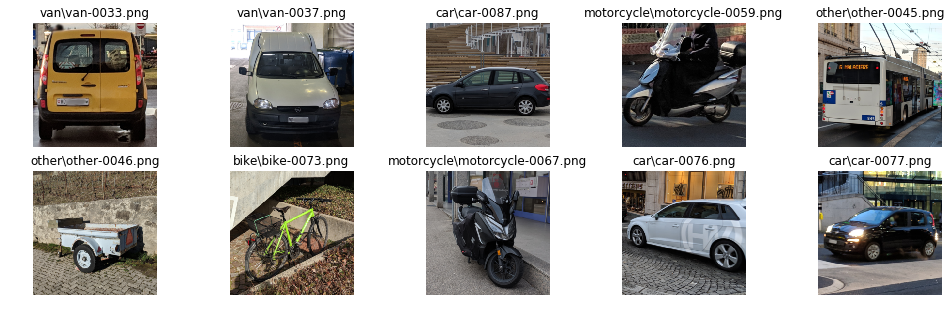

In [11]:
# Chose the best parameter values
# call my function and play around with different parameter values. Let's first start with the best parameters:
# def calc_proba(c_val, max_iter_val,multi_class_val, solver_val, print_val):
calc_proba(100, 50, 'multinomial', 'saga','Y')


#### Vary the regularization strength of your estimator. What is the effect on the probabilities? 

In [12]:
# chose a bigger C=100
calc_proba(100, 50, 'multinomial', 'saga','N')

C:\Users\tgdreju4\Anaconda3\envs\exts-ml\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


,image,bike,car,moto,other,truck,van
6,bike\bike-0073.png,1.0,0.0,0.0,0.0,0.0,0.0
8,car\car-0076.png,0.0,0.99,0.0,0.0,0.0,0.01
9,car\car-0077.png,0.0,0.99,0.0,0.0,0.0,0.01
2,car\car-0087.png,0.0,1.0,0.0,0.0,0.0,0.0
3,motorcycle\motorcycle-0059.png,0.0,0.0,1.0,0.0,0.0,0.0
7,motorcycle\motorcycle-0067.png,0.0,0.0,1.0,0.0,0.0,0.0
4,other\other-0045.png,0.0,0.0,0.0,0.97,0.0,0.02
5,other\other-0046.png,0.0,0.01,0.0,0.0,0.7,0.28
0,van\van-0033.png,0.0,0.03,0.0,0.04,0.88,0.06
1,van\van-0037.png,0.0,0.13,0.0,0.01,0.01,0.84


In [13]:
# chose a very small C=0.001
calc_proba(0.001, 50, 'multinomial', 'saga','N')

C:\Users\tgdreju4\Anaconda3\envs\exts-ml\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


,image,bike,car,moto,other,truck,van
6,bike\bike-0073.png,0.96,0.0,0.01,0.01,0.01,0.01
8,car\car-0076.png,0.01,0.85,0.01,0.02,0.02,0.1
9,car\car-0077.png,0.03,0.78,0.03,0.04,0.03,0.08
2,car\car-0087.png,0.01,0.91,0.01,0.03,0.01,0.03
3,motorcycle\motorcycle-0059.png,0.01,0.01,0.94,0.02,0.01,0.01
7,motorcycle\motorcycle-0067.png,0.01,0.01,0.91,0.03,0.01,0.01
4,other\other-0045.png,0.07,0.1,0.08,0.5,0.09,0.16
5,other\other-0046.png,0.04,0.12,0.06,0.07,0.43,0.28
0,van\van-0033.png,0.02,0.13,0.03,0.16,0.47,0.2
1,van\van-0037.png,0.03,0.24,0.04,0.11,0.1,0.48


__Result:__

> With the best parameter values I get a high probabilty for most of my selected images. For some of the images, e.g. \bike-0073.png, the probability is 100% that this image is showing a bike. ALthough there are some images which are complex and where is it not clear what is is. E.g. \other-0046.png could be a track or a van. It's not clear.
Playing around with the C value had an impact on the probability. A small C value (C=0.001) increases the regularization strenght which implies the creation of simple models that tend to underfit the data. E.g. the probability that van-0033.png is a van is much lower with this C value. With a bigger C value (C=100) the model can increase it's complexity and adjust better to the data. The results are much better. 


#### collect results

In [14]:
# Load the pickle file
df = pd.read_csv(data_dir + 'data.csv', index_col=0)
df = df.append({
       'model':         'Logistic',
       'test accuracy': logreg.score(X_te, y_te) 
            },ignore_index=True)  

df.to_csv(data_dir + 'data.csv')
# read all results from csv and print 
df = pd.read_csv(data_dir + 'data.csv', index_col=0)
df


,model,test accuracy
0,knn,0.84
1,decision tree,0.90
2,Logistic,0.94
